In [57]:
import numpy as np
import os
import seaborn as sns
from scipy.io import wavfile
from tqdm import tqdm

lj_dir = "/Users/lukgar/Desktop/exjobb/datasets/LJSpeech-1.1/wavs"

# Get all the files in the directory
files = os.listdir(lj_dir)

# Get the length of each file
lengths = np.zeros(len(files))

for i, file in tqdm(enumerate(files), total=len(files)):
    # if it is not a wal file, skip

    if not file.endswith(".wav"):
        continue

    _, d = wavfile.read(os.path.join(lj_dir, file))
    lengths[i] = d.size

100%|██████████| 13101/13101 [01:25<00:00, 154.12it/s]


In [58]:
# get the longest audio clip

max_length = np.max(lengths)
max_length_index = np.argmax(lengths)

print("Longest audio clip: {} seconds".format(max_length/22050))

# play it

import IPython.display as ipd
ipd.Audio(os.path.join(lj_dir, files[max_length_index]))

Longest audio clip: 10.096190476190475 seconds


/usr/local/Caskroom/miniconda/base/envs/thesis/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Length (seconds)')

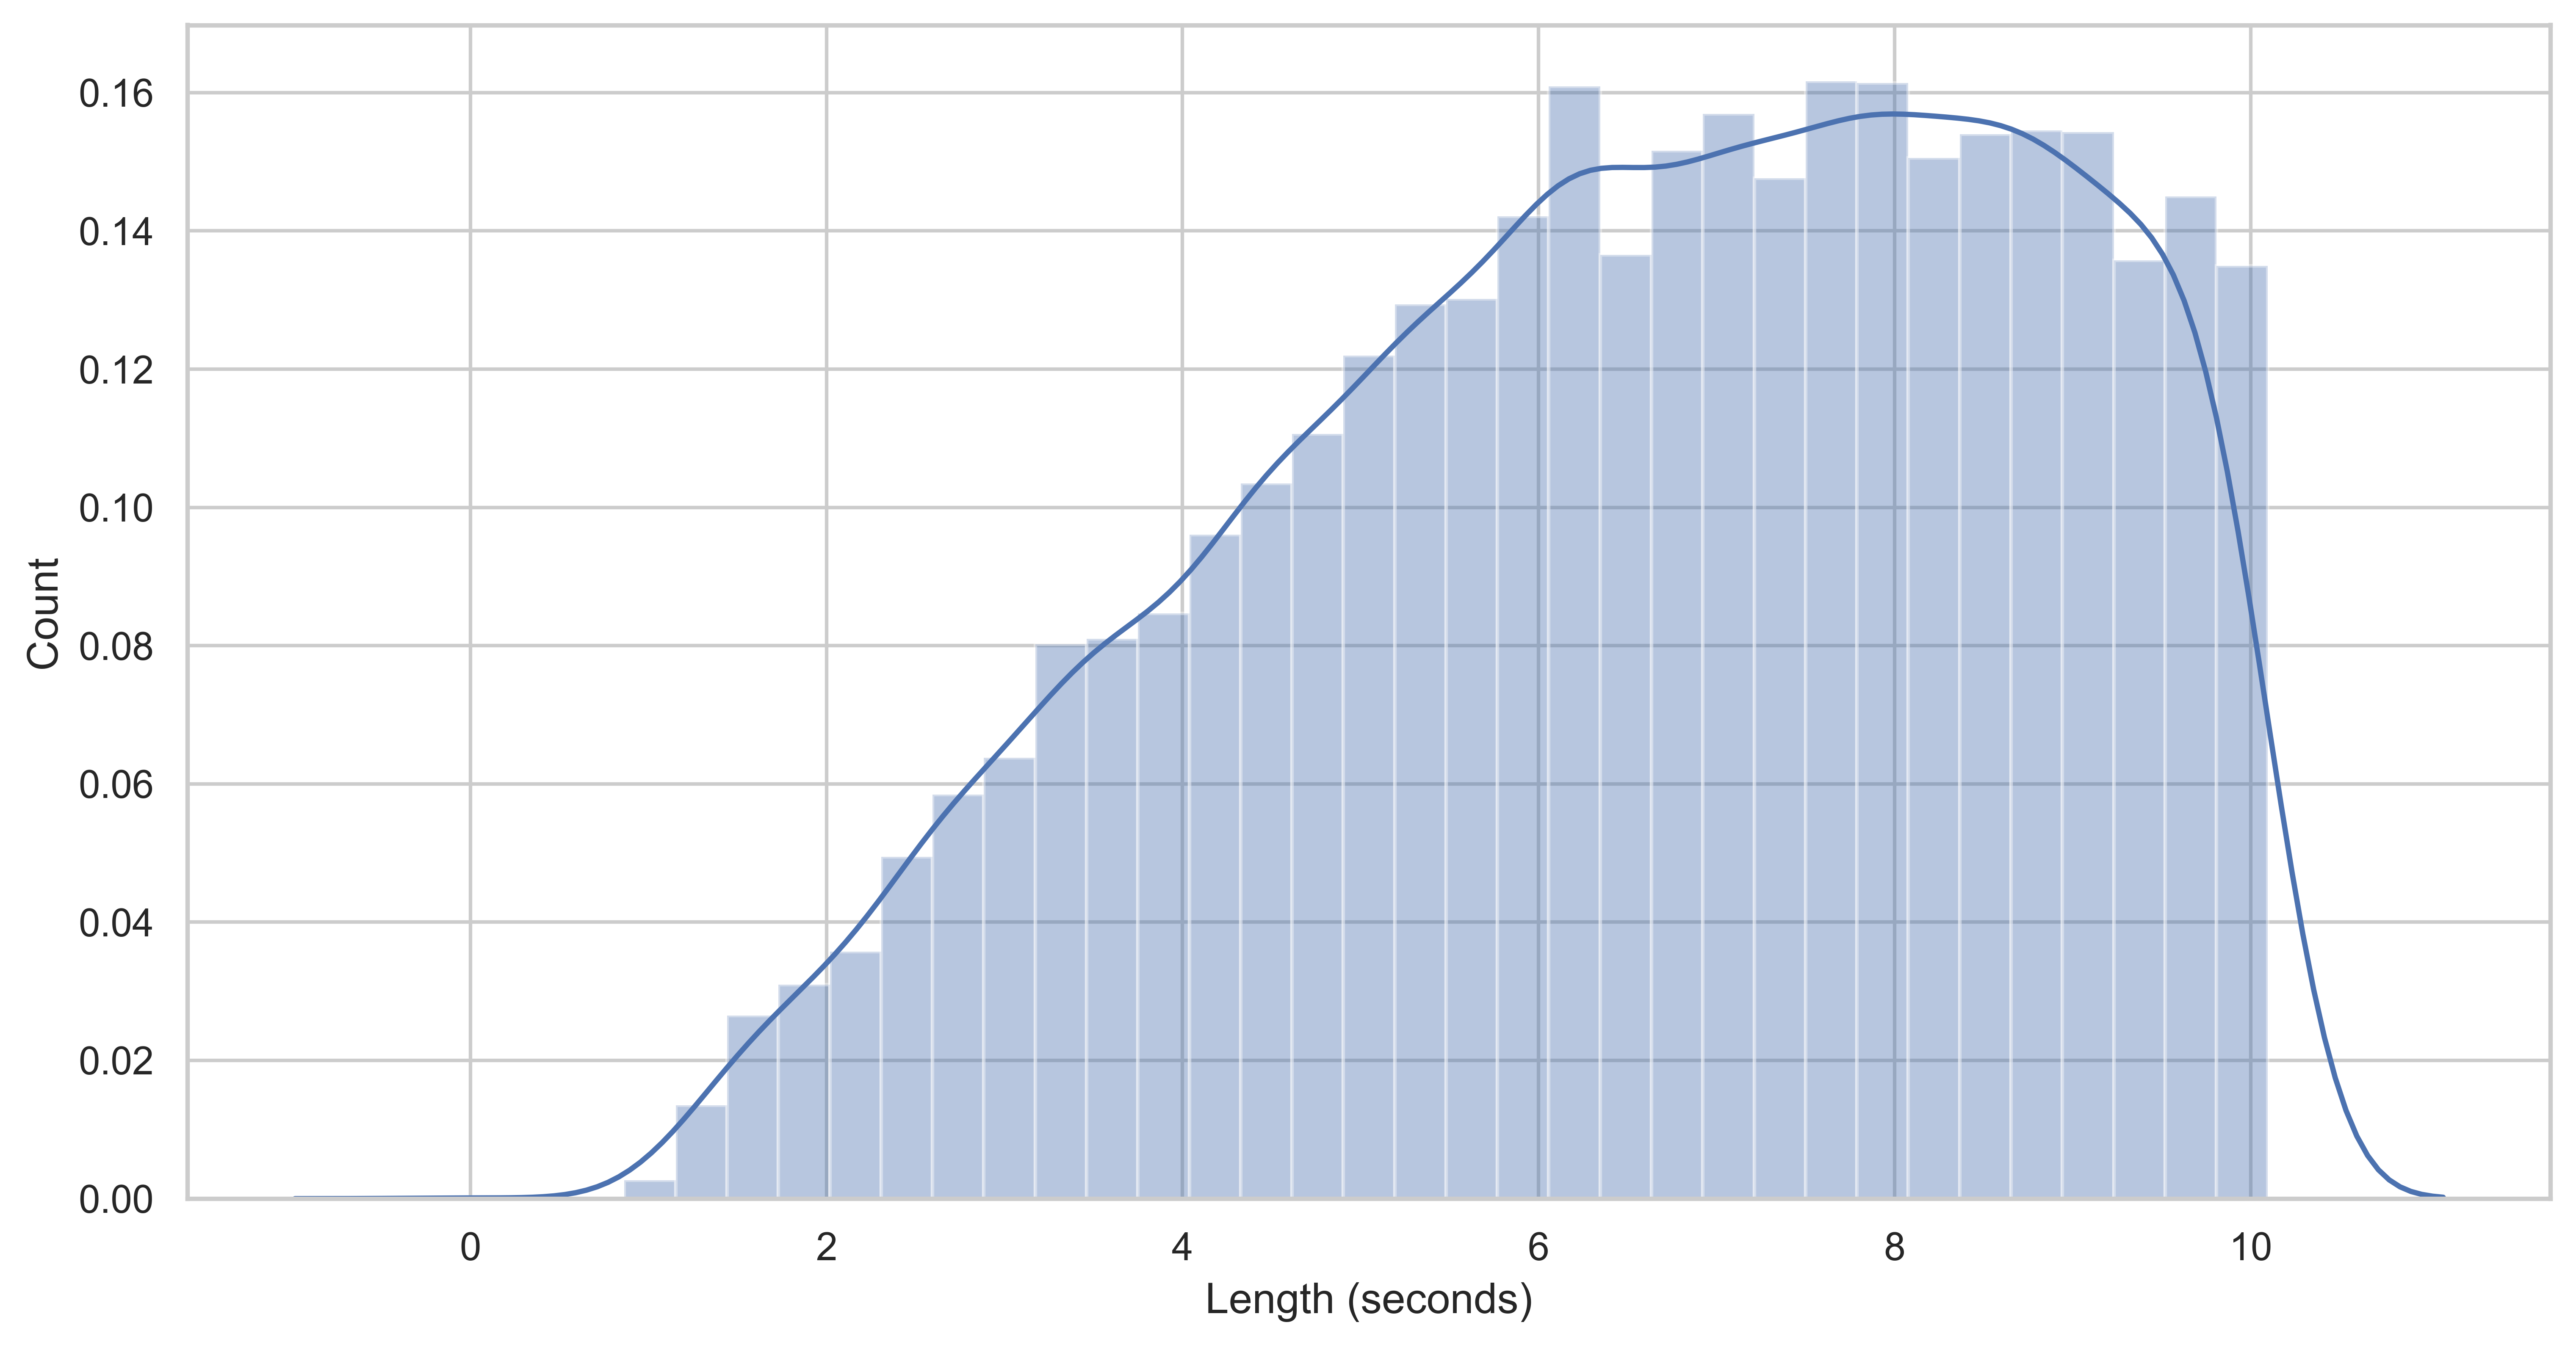

In [59]:
# Plot the distribution of lengths
import matplotlib.pyplot as plt
# set white background in seaborn

fig, ax = plt.subplots(figsize=(12, 6), dpi=600)

sns.set_style("whitegrid")

sns.distplot(lengths/22050, ax=ax);

# change x range
#ax.set_xlim(0, 22)

ax.set_ylabel("Count")
ax.set_xlabel("Length (seconds)")


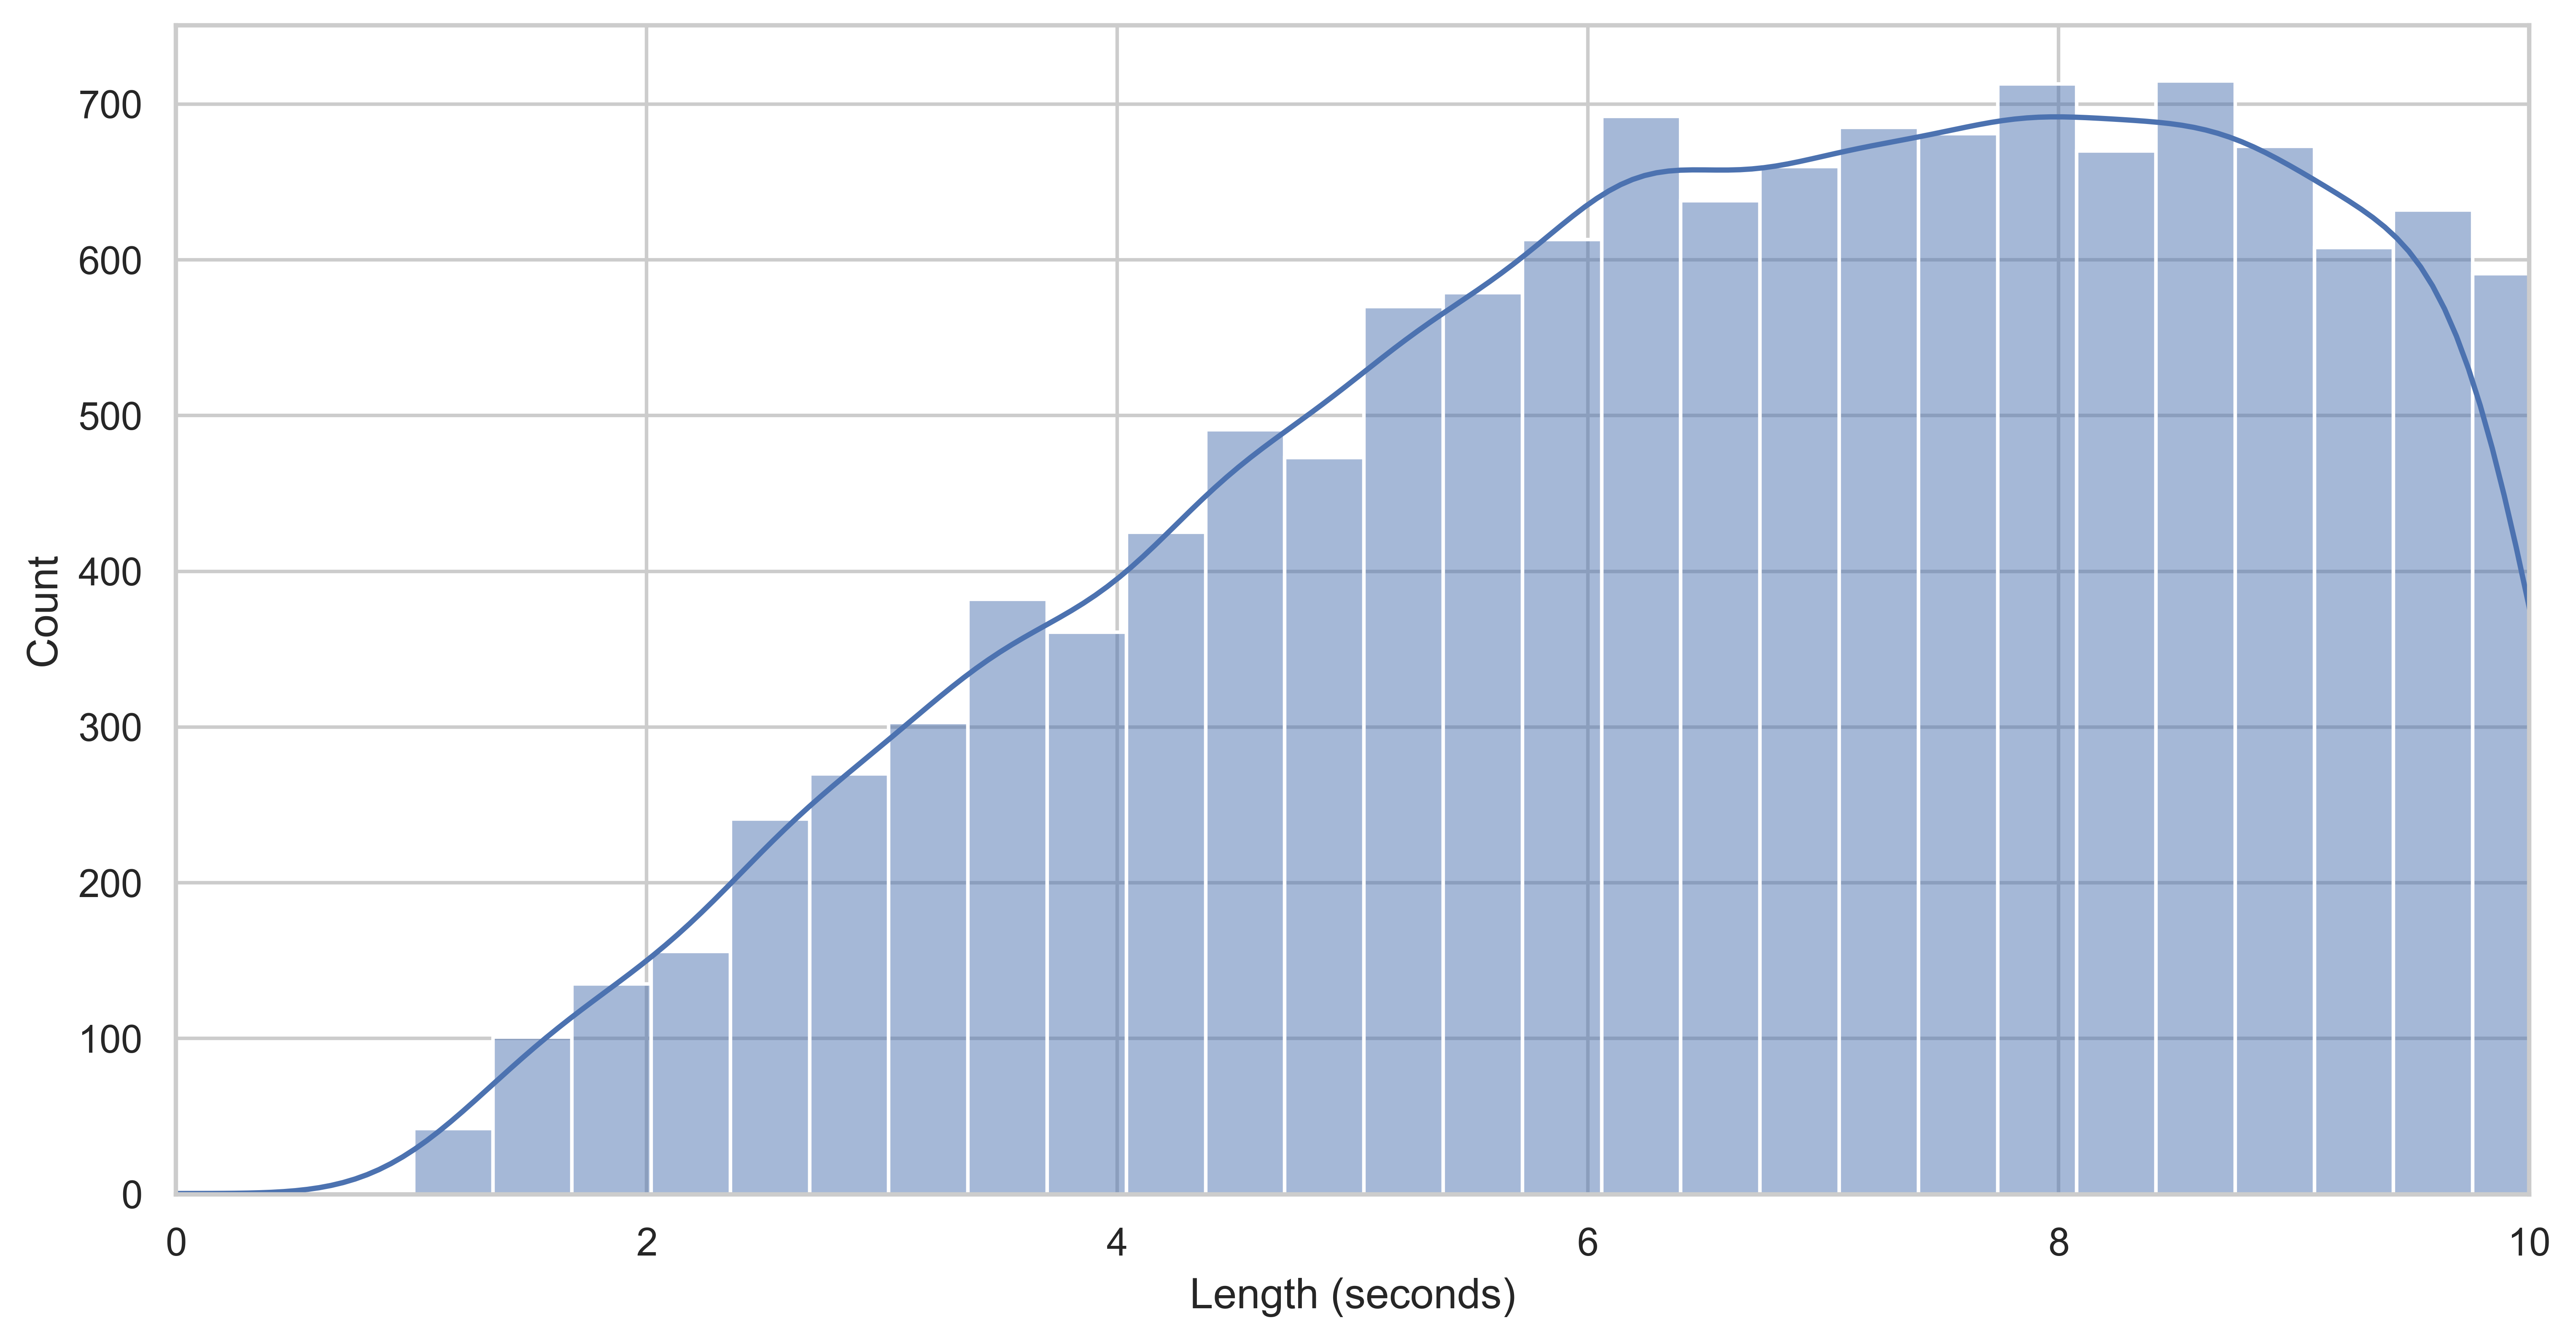

In [62]:
fig2, ax2 = plt.subplots(figsize=(12, 6), dpi=600)

ax2.set_xlim(0, 10)
ax2.set_ylabel("Count")
ax2.set_xlabel("Length (seconds)")
sns.histplot(lengths/22050, ax=ax2, bins=30, kde=True);
